[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.6s finished


Accuracy: 0.7863636363636364

Classification Report:

              precision    recall  f1-score   support

        -1.0       0.71      0.87      0.78       750
         0.0       0.78      0.78      0.78        50
         1.0       0.96      0.50      0.66        50
         2.0       0.95      0.80      0.87        50
         3.0       0.85      0.70      0.77        50
         4.0       0.79      0.74      0.76        50
         5.0       0.83      0.76      0.79        50
         6.0       0.77      0.92      0.84        50
         7.0       0.67      0.92      0.77        50
         8.0       0.88      0.72      0.79        50
         9.0       0.79      0.82      0.80        50
        10.0       0.89      0.80      0.84        50
        11.0       0.95      0.78      0.86        50
        12.0       0.83      0.86      0.84        50
        13.0       0.77      0.54      0.64        50
        14.0       0.59      0.72      0.65        50
        15.0       0.67    

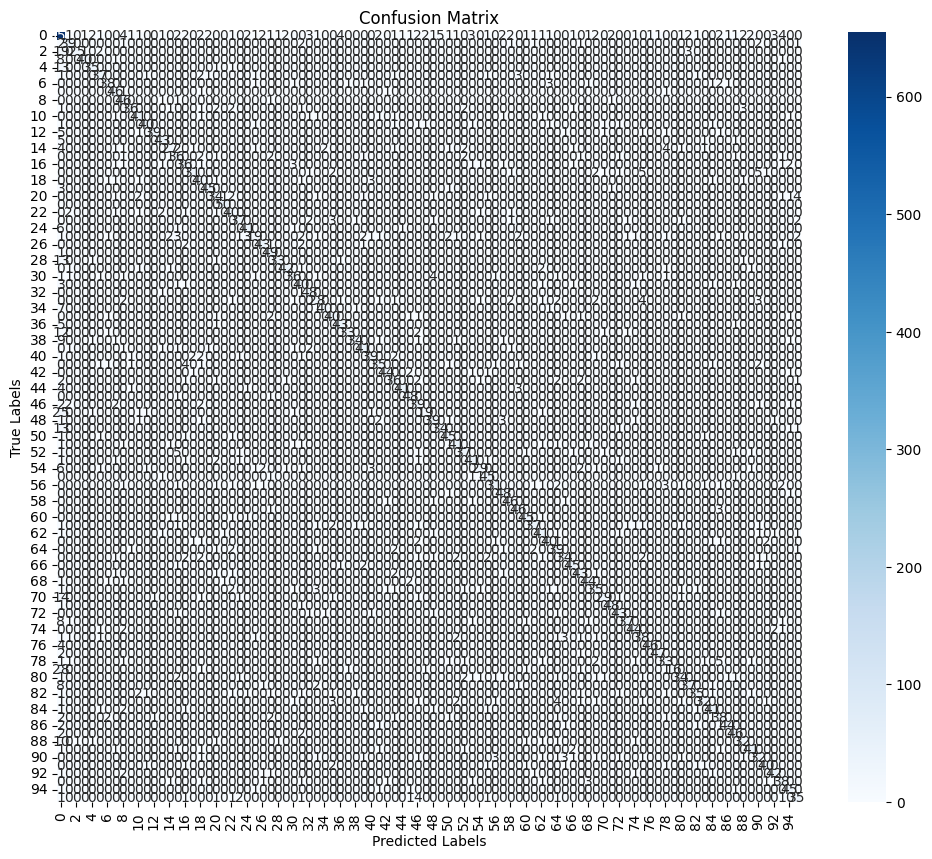

In [17]:
import numpy as np
import pickle
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load test data
X_test = np.load("X_test_mc.npy")
y_test = np.load("y_test_mc.npy")

# 2. Load the trained model
with open("rf_multi_model.pkl", "rb") as f:
    model = pickle.load(f)

# 3. Make predictions
y_pred = model.predict(X_test)

# 4. Evaluate
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# 5. Confusion Matrix (with heatmap)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


Overall Accuracy
The model achieved an overall accuracy of 78.6% on the test set.
This indicates that roughly 79 out of 100 samples are correctly classified.

Class-wise Performance
From the classification report:

- Some classes like 20.0 have perfect recall (1.00) and very high F1-score (0.97),
  meaning the model identifies almost all samples of that class correctly.
- Some classes, e.g., 78.0, have low recall (0.32) and F1-score (0.48),
  indicating the model struggles to correctly classify these samples.
- Overall, the macro average precision, recall, and F1-score are 0.81, 0.77, and 0.78, respectively.
  This shows that while the model performs well on many classes,
  it is less effective on harder-to-classify classes.

Confusion Matrix Insight
The confusion matrix shows which classes are often confused.
For example:

- Class 7.0 has high recall (0.92) but lower precision (0.67),
  meaning many other classes are misclassified as 7.0.
- Class 78.0 is heavily misclassified, which may require more training data
  or feature improvement for that class.
  
Visualizing the confusion matrix helps identify which classes need improvement.

Overall Summary
In summary, the Random Forest multi-class model performs well for most classes,
achieving nearly 79% accuracy overall. Some classes are harder to classify,
as shown by lower F1-scores and recall.
Improving model performance may involve:

- Collecting more training data for underperforming classes.
- Tuning hyperparameters of the Random Forest.
- Using additional features or feature engineering.